<a href="https://colab.research.google.com/github/ksranjith786/python/blob/master/MachineLearning/StockPrediction/StockPriceHistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**<br>

We aim to predict the daily adjusted closing prices of Indian Stock Market XYZ share price, using data from the previous N days. We will use X years of historical prices for XYZ from Start Date to End Date, which can be easily downloaded from nsepy.


In [1]:
!pip install nsepy --upgrade
!pip install mpl_finance --upgrade
!pip install plotly --upgrade

  Created wheel for nsepy: filename=nsepy-0.7-cp36-none-any.whl size=34388 sha256=da783c68d03494d9f9a574888d4aceb9e1dbf58ac866879a072cf5397d8b1521
  Stored in directory: /root/.cache/pip/wheels/88/89/1e/3dfa14f863314a42481d8926d9ef4825da5d899e026435fc3a
Successfully built nsepy
  Created wheel for mpl-finance: filename=mpl_finance-0.10.0-cp36-none-any.whl size=5509 sha256=008e809fb9dcf4e50eece3f55cca142729350cde3d7092bedcf9a1d85100fb44
  Stored in directory: /root/.cache/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance
     |████████████████████████████████| 7.3MB 56kB/s 
  Found existing installation: plotly 4.1.1
    Uninstalling plotly-4.1.1:
      Successfully uninstalled plotly-4.1.1


In [0]:
#from google.colab import files
#uploaded = files.upload()

In [139]:
import numpy as np
import pandas as pd

#to plot within notebook
import matplotlib.pyplot as plt

%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 15

from mpl_finance import candlestick_ohlc

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

import plotly.graph_objs as go


In [0]:
from datetime import date
from nsepy import get_history

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dirPath = '/content/drive/My Drive/Colab Notebooks/'

In [0]:
startDate = date(2015,1,1)
endDate = date.today()
stockSymbol='SJVN'

In [0]:
stockPrices = get_history(symbol=stockSymbol,
                   start=startDate,
                   end=endDate)
stockPrices.to_csv(dirPath + './' + stockSymbol + '.csv')

In [0]:
stockPrices.reset_index(inplace=True)

In [70]:
stockPrices[['Date', 'Open', 'High', 'Low', 'Close']]

Date   Open   High    Low  Close
0     2015-01-01  24.60  25.00  24.20  24.80
1     2015-01-02  25.30  25.60  25.00  25.05
2     2015-01-05  25.10  25.70  24.40  25.40
3     2015-01-06  25.05  25.25  24.25  24.50
4     2015-01-07  24.55  24.80  24.30  24.70
...          ...    ...    ...    ...    ...
1208  2019-11-25  24.70  24.80  24.60  24.80
1209  2019-11-26  24.85  24.95  24.65  24.70
1210  2019-11-27  24.80  24.80  24.70  24.75
1211  2019-11-28  24.95  24.95  24.55  24.60
1212  2019-11-29  24.65  24.80  24.60  24.70

[1213 rows x 5 columns]

In [220]:
df = stockPrices[['Date', 'Open', 'High', 'Low', 'Close']]
#df['Date'] = pd.to_datetime(df['Date'])
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])


fig.show()

In [221]:
#df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 5 columns):
Date     1213 non-null object
Open     1213 non-null float64
High     1213 non-null float64
Low      1213 non-null float64
Close    1213 non-null float64
dtypes: float64(4), object(1)
memory usage: 47.5+ KB


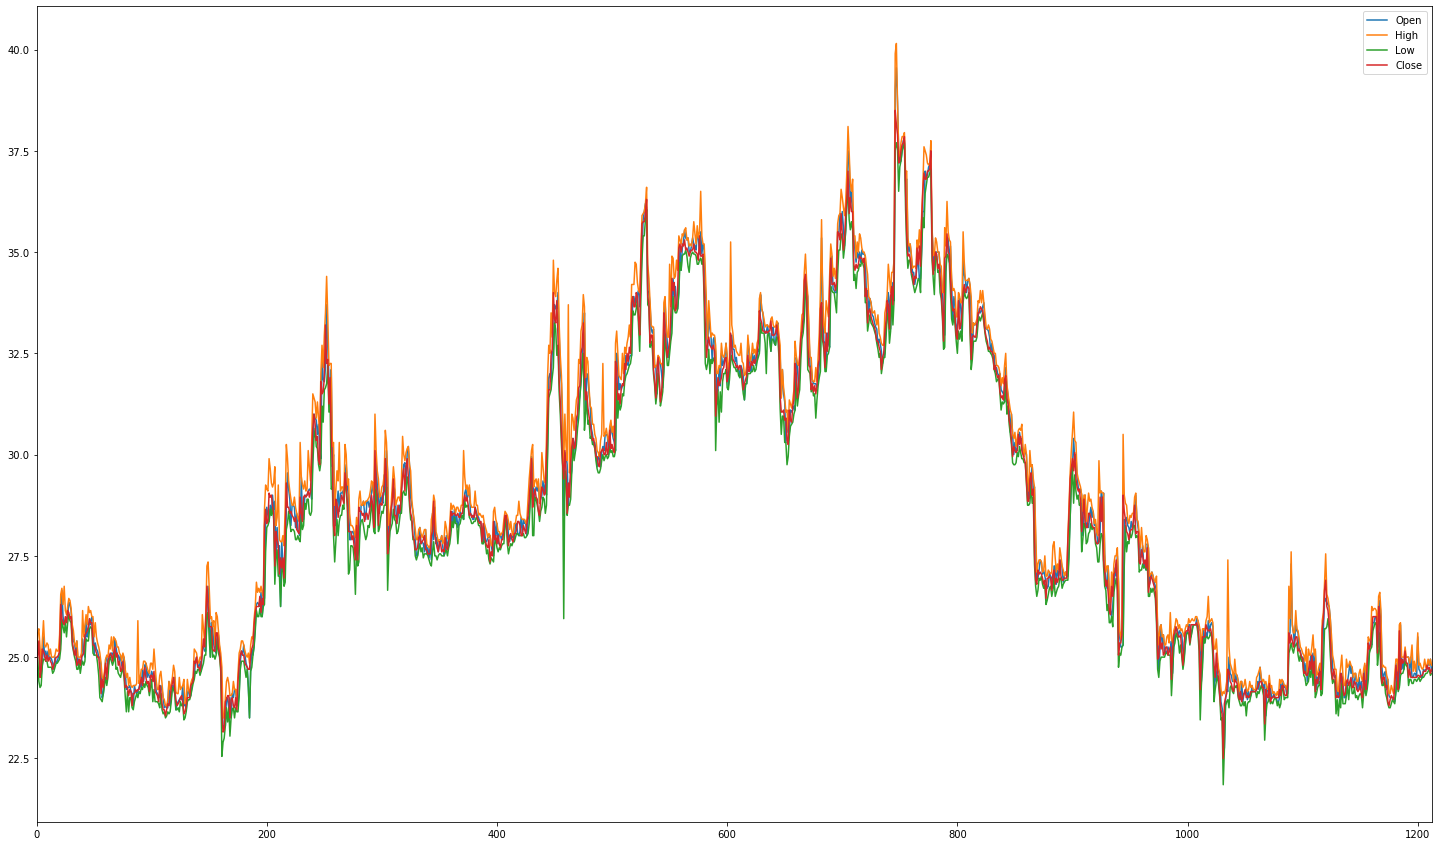

In [222]:
df.plot()

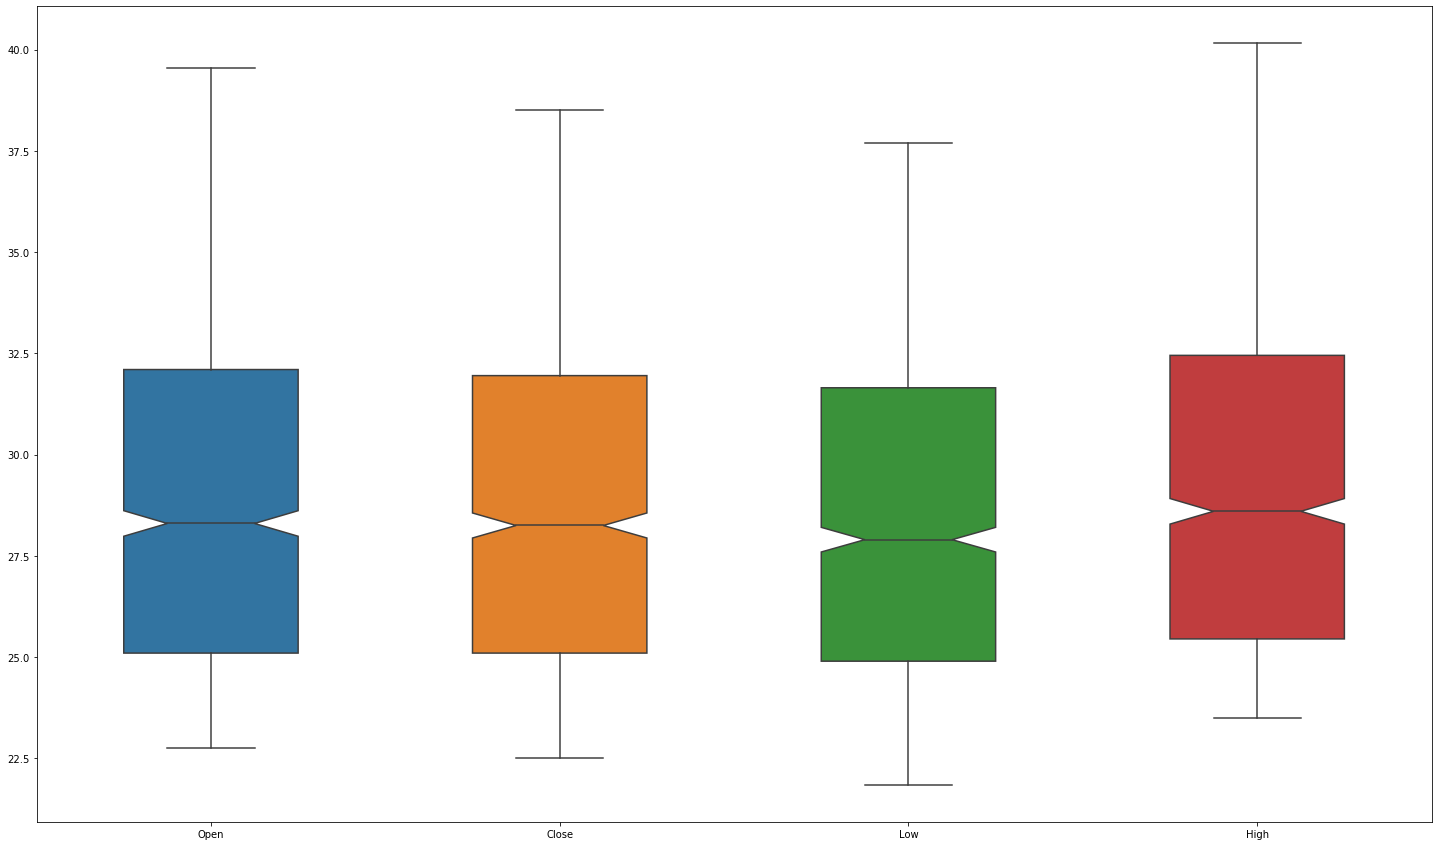

In [230]:
import seaborn as sns
sns.boxplot(data=df[['Open', 'Close', 'Low', 'High']], notch=True, width=0.5)

In [141]:
stockPrices.head()

Date Symbol Series  ...  Trades  Deliverable_Volume  %Deliverble
0  2015-01-01   SJVN     EQ  ...    1467              406618       0.6197
1  2015-01-02   SJVN     EQ  ...    3472              682123       0.5305
2  2015-01-05   SJVN     EQ  ...    3001              573438       0.6362
3  2015-01-06   SJVN     EQ  ...    1796              417558       0.6229
4  2015-01-07   SJVN     EQ  ...     929              141046       0.4007

[5 rows x 15 columns]

In [142]:
stockPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 15 columns):
Date                  1213 non-null object
Symbol                1213 non-null object
Series                1213 non-null object
Prev_Close            1213 non-null float64
Open                  1213 non-null float64
High                  1213 non-null float64
Low                   1213 non-null float64
Last                  1213 non-null float64
Close                 1213 non-null float64
VWAP                  1213 non-null float64
Volume                1213 non-null int64
Turnover              1213 non-null float64
Trades                1213 non-null int64
Deliverable_Volume    1213 non-null int64
%Deliverble           1213 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 142.3+ KB


In [143]:
# Convert Date column to datetime
#stockPrices.loc[:, 'Date'] = pd.to_datetime(stockPrices.Date,format='%Y-%m-%d')

# Change all column headings to be lower case, and remove spacing
stockPrices.columns = [str(x).replace(' ', '_') for x in stockPrices.columns]

stockPrices.head()

Date Symbol Series  ...  Trades  Deliverable_Volume  %Deliverble
0  2015-01-01   SJVN     EQ  ...    1467              406618       0.6197
1  2015-01-02   SJVN     EQ  ...    3472              682123       0.5305
2  2015-01-05   SJVN     EQ  ...    3001              573438       0.6362
3  2015-01-06   SJVN     EQ  ...    1796              417558       0.6229
4  2015-01-07   SJVN     EQ  ...     929              141046       0.4007

[5 rows x 15 columns]

In [144]:
stockPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 15 columns):
Date                  1213 non-null object
Symbol                1213 non-null object
Series                1213 non-null object
Prev_Close            1213 non-null float64
Open                  1213 non-null float64
High                  1213 non-null float64
Low                   1213 non-null float64
Last                  1213 non-null float64
Close                 1213 non-null float64
VWAP                  1213 non-null float64
Volume                1213 non-null int64
Turnover              1213 non-null float64
Trades                1213 non-null int64
Deliverable_Volume    1213 non-null int64
%Deliverble           1213 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 142.3+ KB


In [0]:
stockPricesLimited = stockPrices[['Date', 'Open', 'High', 'Low', 'Last', 'Prev_Close', 'Close']]
#stockPricesLimited = stockPrices[['Date', 'Open', 'Close']]

In [0]:
cvSize = 0.2
testSize = 0.2 

In [0]:
stockPricesNum = len(stockPricesLimited)
cvNum = int(cvSize * stockPricesNum)
testNum = int(testSize * stockPricesNum)
trainNum = int(stockPricesNum - cvNum - testNum)

trainStockPrices = stockPricesLimited[0:trainNum]
cvStockPrices = stockPricesLimited[trainNum:trainNum+cvNum]
testStockPrices = stockPricesLimited[trainNum+cvNum:]

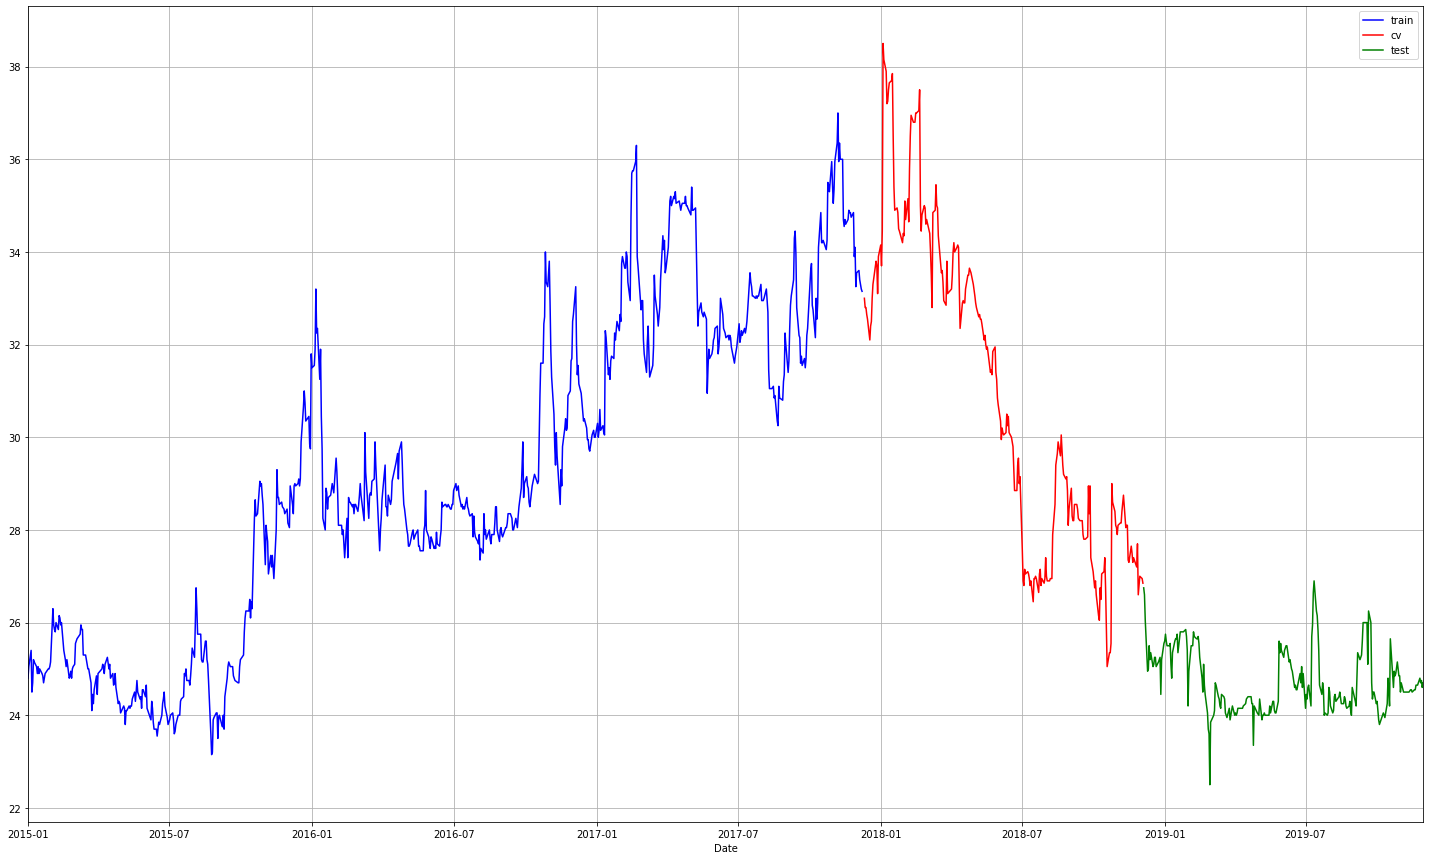

In [176]:
ax = trainStockPrices.plot(x='Date', y='Close', style='b-', grid=True)
ax = cvStockPrices.plot(x='Date', y='Close', style='r-', grid=True, ax=ax)
ax = testStockPrices.plot(x='Date', y='Close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'cv', 'test'])

In [177]:
'''
def SimpleMovingAverage(inputSeries, noOfDays):
  """
  This function calculates the Simple Moving Average for the given data, where noOfDays gives how many no.of days average to be determined
  
  Parameters:
    inputSeries(Series) : list of values as a Series to compute SMA
    noOfDays(int)       : number of days to compute SMA
  Returns:
    Array : list of computed SMA

  """
  # Get the values for the initial no.of Days as we cannot calculate the average; Eg. For the 5 day SMA, we cannot have values for first 5 rows, so extract them.
  outList = inputSeries[0:noOfDays].values

  # Compute the average for the input series
  for i in range(noOfDays, inputSeries.size):
    endIndex = i
    startIndex = endIndex - noOfDays
    outList = np.append(outList, inputSeries.iloc[startIndex:endIndex].values.mean())

  return outList
'''

'\ndef SimpleMovingAverage(inputSeries, noOfDays):\n  """\n  This function calculates the Simple Moving Average for the given data, where noOfDays gives how many no.of days average to be determined\n  \n  Parameters:\n    inputSeries(Series) : list of values as a Series to compute SMA\n    noOfDays(int)       : number of days to compute SMA\n  Returns:\n    Array : list of computed SMA\n\n  """\n  # Get the values for the initial no.of Days as we cannot calculate the average; Eg. For the 5 day SMA, we cannot have values for first 5 rows, so extract them.\n  outList = inputSeries[0:noOfDays].values\n\n  # Compute the average for the input series\n  for i in range(noOfDays, inputSeries.size):\n    endIndex = i\n    startIndex = endIndex - noOfDays\n    outList = np.append(outList, inputSeries.iloc[startIndex:endIndex].values.mean())\n\n  return outList\n'

In [178]:
'''
series = stockPricesLimited['Close']
%timeit stockPricesLimited['SMA5'] = SimpleMovingAverage(series, 5)
stockPricesLimited['SMA20'] = SimpleMovingAverage(series, 20)

#stockPrices.set_index(['Date'], inplace=True)
stockPricesLimited.iloc[0:15]
'''

"\nseries = stockPricesLimited['Close']\n%timeit stockPricesLimited['SMA5'] = SimpleMovingAverage(series, 5)\nstockPricesLimited['SMA20'] = SimpleMovingAverage(series, 20)\n\n#stockPrices.set_index(['Date'], inplace=True)\nstockPricesLimited.iloc[0:15]\n"

In [0]:
def SimpleMovingAverage(df, label, N, offset=0):
  out = df[label].rolling(window=N).mean()
  return out[offset:]

In [180]:
for nDay in range(1, 21):
  predictedList = SimpleMovingAverage(stockPricesLimited, 'Close', nDay, trainNum)
  cvStockPrices['PredClose'+'MA'+str(nDay)] = predictedList

cvStockPrices


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date   Open   High  ...  PredCloseMA18  PredCloseMA19  PredCloseMA20
729  2017-12-11  33.15  33.35  ...      34.036111      34.063158        34.0950
730  2017-12-12  33.10  33.20  ...      33.930556      33.971053        34.0000
731  2017-12-13  32.70  33.45  ...      33.830556      33.871053        33.9125
732  2017-12-14  32.85  33.00  ...      33.716667      33.768421        33.8100
733  2017-12-15  32.75  32.90  ...      33.586111      33.655263        33.7075
..          ...    ...    ...  ...            ...            ...            ...
966  2018-11-28  27.70  27.70  ...      27.761111      27.776316        27.7925
967  2018-11-29  26.80  27.00  ...      27.700000      27.710526        27.7275
968  2018-11-30  26.95  27.05  ...      27.638889      27.663158        27.6750
969  2018-12-03  27.10  27.10  ...      27.572222      27.602632        27.6275
970  2018-12-04  27.00  27.00  ...      27.500000      27.534211        27.5650

[242 rows x 27 columns]

In [181]:
predictColumn = 'PredCloseMA5'
computeError = cvStockPrices[['Close', predictColumn]]
computeError['Error'] = computeError['Close'] - computeError[predictColumn]
computeError['SquareError'] = computeError['Error'] ** 2
computeError['AbsoluteError'] = computeError['Error'] / computeError['Close']
computeError['AbsolutePercentError'] = computeError['Error'] / computeError['Close'] * 100
print(computeError.tail())
# Root Mean Square Error
print(np.sqrt(np.mean(computeError['SquareError'])))
# Mean Absolute Percentage Error
print(np.mean(np.abs(computeError['AbsolutePercentError'])))

     Close  PredCloseMA5  ...  AbsoluteError  AbsolutePercentError
966  26.60         27.24  ...      -0.024060             -2.406015
967  26.80         27.14  ...      -0.012687             -1.268657
968  27.00         27.06  ...      -0.002222             -0.222222
969  26.95         27.01  ...      -0.002226             -0.222635
970  26.85         26.84  ...       0.000372              0.037244

[5 rows x 6 columns]
0.6335219017524165
1.3565664036779754


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

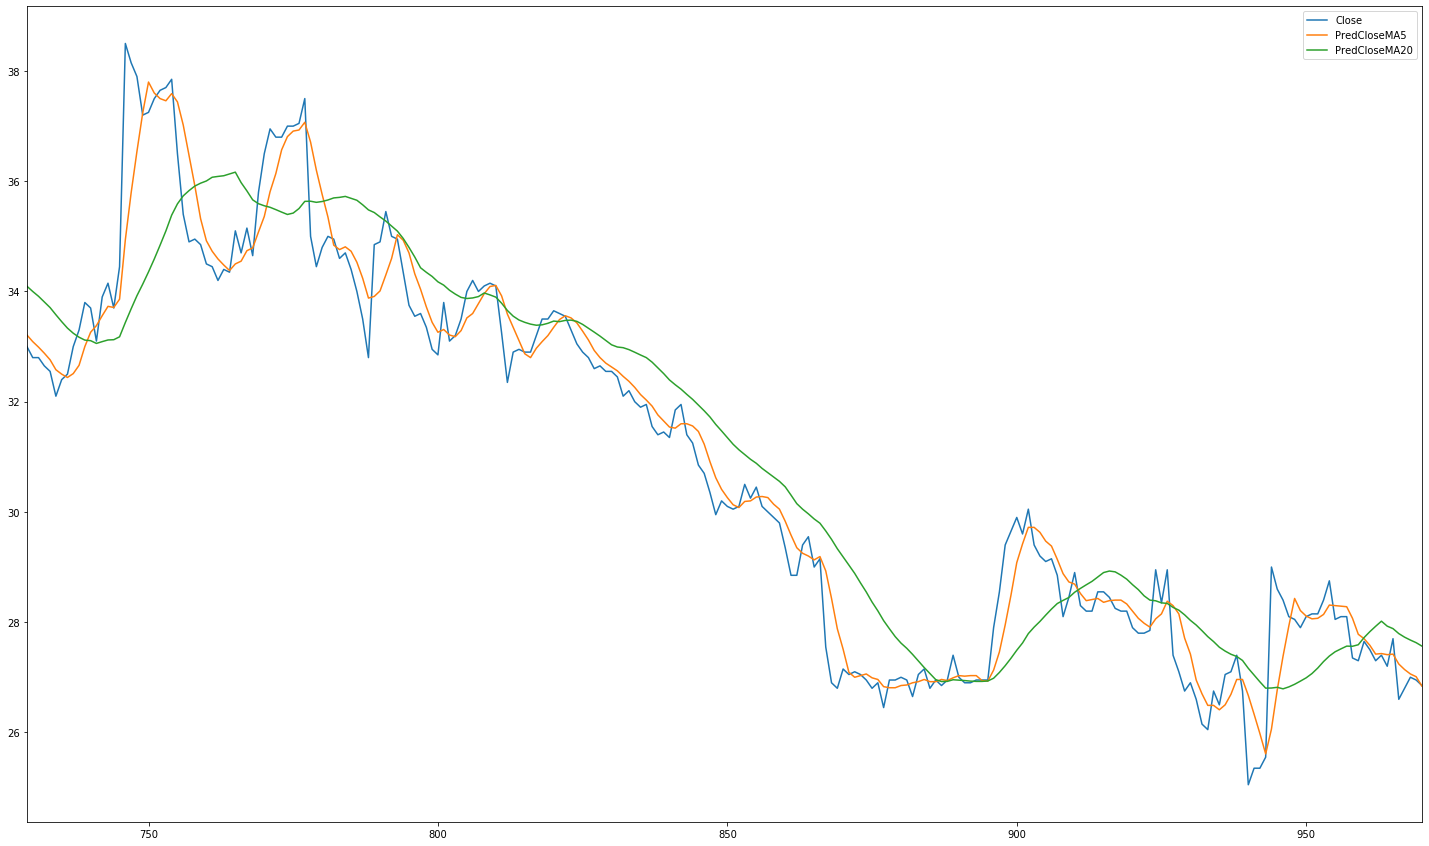

In [182]:
cvStockPrices[['Date', 'Close', 'PredCloseMA5', 'PredCloseMA20']].plot()

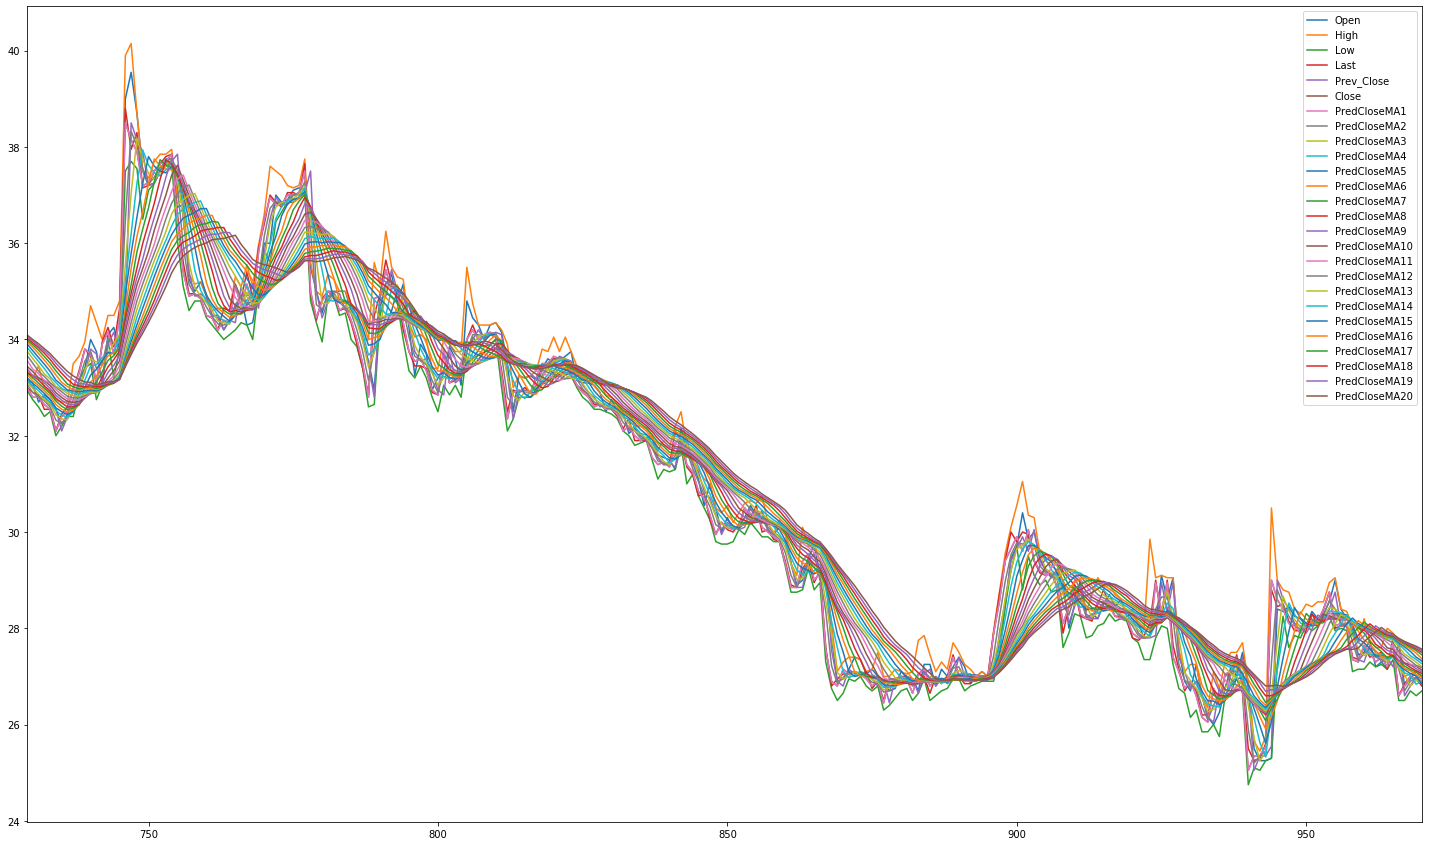

In [183]:
cvStockPrices.plot()

In [0]:
#cvStockPrices = stockPricesLimited[trainNum:trainNum+cvNum]

In [0]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error

In [0]:
#from sklearn.cross_validation import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)

In [187]:
print(explained_variance_score(cvStockPrices['Close'], cvStockPrices[predictColumn]))
print(mean_absolute_error(cvStockPrices['Close'], cvStockPrices[predictColumn]))
print(mean_squared_error(cvStockPrices['Close'], cvStockPrices[predictColumn]))
print(mean_squared_log_error(cvStockPrices['Close'], cvStockPrices[predictColumn]))
print(median_absolute_error(cvStockPrices['Close'], cvStockPrices[predictColumn]))

0.9654545246906632
0.42301652892561387
0.40134999999999826
0.0003808227011715451
0.27499999999994884


In [188]:
out = stockPricesLimited['Close'].rolling(window=5).mean()
print(out)

0         NaN
1         NaN
2         NaN
3         NaN
4       24.89
        ...  
1208    24.66
1209    24.69
1210    24.71
1211    24.70
1212    24.71
Name: Close, Length: 1213, dtype: float64


In [0]:
#stockPrices[['Close', 'SMA5', 'SMA20']].plot()

In [0]:
#stockPricesLimited

In [191]:
stockPricesLimited['Timestamp'] = [sday.strftime("%s") for sday in stockPricesLimited['Date']] 
stockPricesLimited.drop(labels=['Date'], axis=1, inplace=True)
train = stockPricesLimited[0:1000]
test = stockPricesLimited[1000:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_test = test.drop('Close', axis=1)
y_test = test['Close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [192]:
# Implementing linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predictions
y_pred = model.predict(x_test)

In [194]:
rmss = np.sqrt(np.mean(np.power( (np.array(y_test)-np.array(y_pred)),2)))
print(rmss)

0.08734583960685867


In [195]:
mean_squared_error(y_test, y_pred)

0.007629295696627081

In [196]:
y_test.shape

(213,)

In [197]:
y_pred.shape

(213,)

(1213, 7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



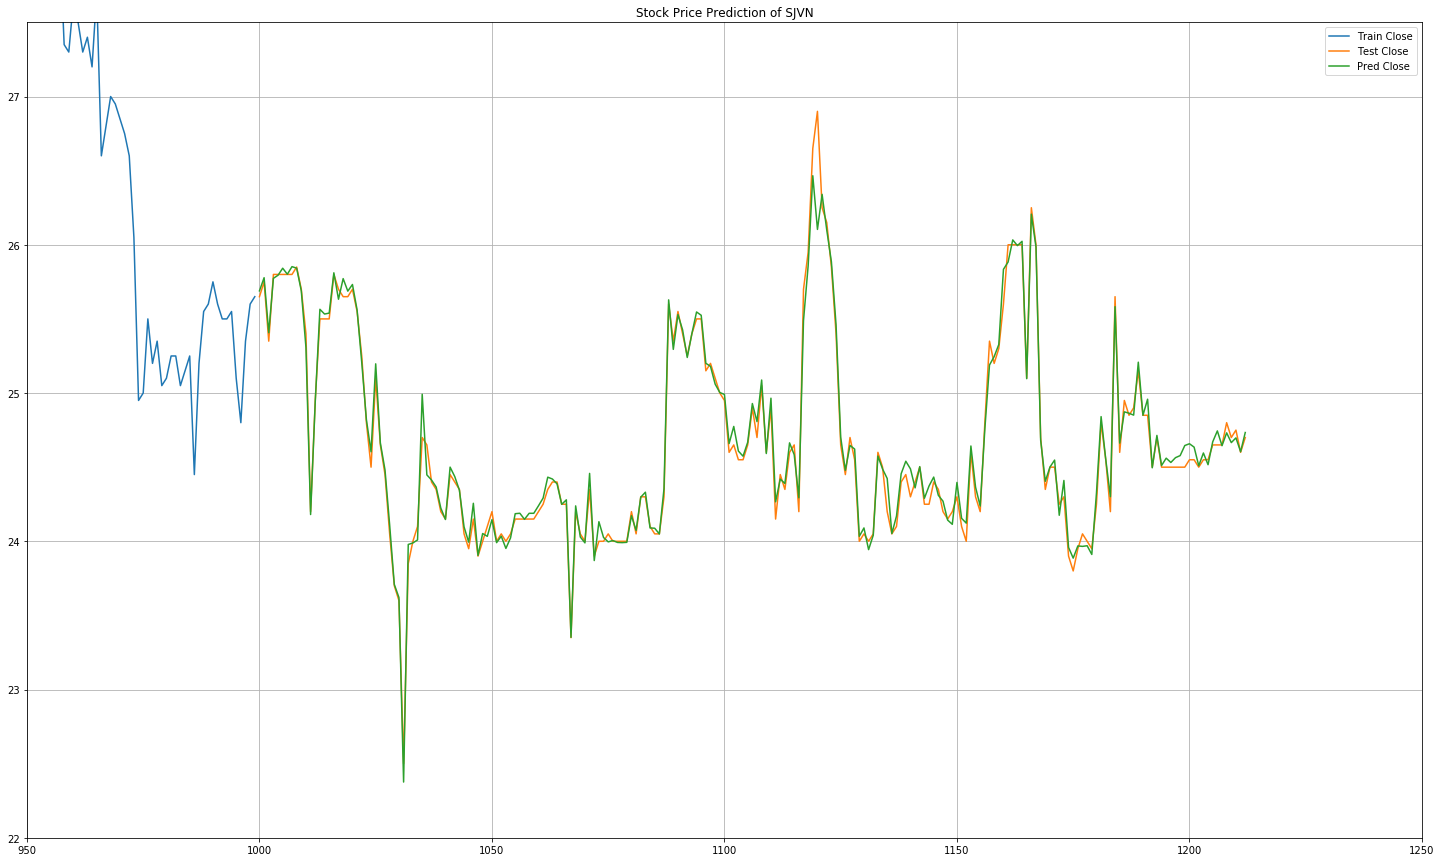

In [206]:
test['Pred Close'] = y_pred
plt.plot(train['Close'])
plt.plot(test[['Close', 'Pred Close']])
plt.legend(['Train Close', 'Test Close', 'Pred Close'])
plt.title('Stock Price Prediction of ' + stockSymbol)
plt.xlim(950, 1250)
plt.ylim(22, 27.5)
plt.grid()

Open  Close   Timestamp  Pred Close
1000  25.60  25.65  1547596800   25.615636
1001  25.80  25.75  1547683200   25.811705
1002  25.80  25.35  1547769600   25.811728
1003  25.50  25.80  1548028800   25.517726
1004  25.70  25.80  1548115200   25.713795
...     ...    ...         ...         ...
1208  24.70  24.80  1574640000   24.740507
1209  24.85  24.70  1574726400   24.887565
1210  24.80  24.75  1574812800   24.838576
1211  24.95  24.60  1574899200   24.985633
1212  24.65  24.70  1574985600   24.691586

[213 rows x 4 columns]